In [76]:
# Nama : Alif Firmansyah
# NIM : 1103204105
# Kelas : TK44G4

# 1. Memuat Library

In [77]:
import pandas as pd #library untuk memanggil dataset
import numpy as np #library untuk menggunakan fungsi matematika
import datetime as datetime #libary untuk menggunakan tanggal/waktu
import matplotlib.pyplot as plt #digunakan untuk membuat grafik
import seaborn as sns #digunakan untuk membuat heatmap
from sklearn.model_selection import train_test_split #digunakan untuk testing dan training

# 2. Memuat Dataset

In [78]:
house = pd.read_csv ("/kaggle/input/melb-housing-price/melb_data.csv") #memanggil dataset
house.head()#mengecek 5 kolom pertama

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [79]:
house.info() #mengecek value tiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# 3. Membersihkan Dataset

In [80]:
dataset = house.copy() #dataset yang akan digunakan untuk menghindari perubahan pada data yang asli

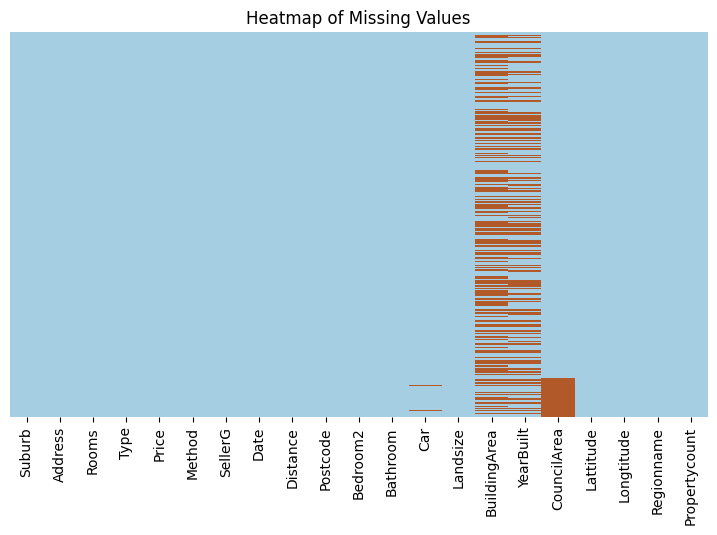

In [81]:
plt.figure(figsize=(9,5)) #memplot grafik dengan panjang 9 lebar 5
sns.heatmap(dataset.isnull(),yticklabels=False, cbar=False, cmap="Paired"); #Membuat heatmap dengan kondisi jika data kosong maka akan diberi label
plt.title("Heatmap of Missing Values"); #memberi judul pada heatmap

In [82]:
# Kolom dengan data yang kosong
nol = dataset.isnull().sum().sort_values(ascending = False).head(5)
nol_per = (nol/len(dataset))*100

# Membuat presentasi dari data kosong
pd.DataFrame({'Data Kosong': nol, 'Presentase': nol_per.values})

,Data Kosong,Presentase
BuildingArea,6450,47.496318
YearBuilt,5375,39.580265
CouncilArea,1369,10.081001
Car,62,0.456554
Suburb,0,0.000000


**3A. Membersihkan Kolom Car**

In [83]:
dataset['Car'].value_counts() #membersihkan dataset satu persatu

Car
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

In [84]:
# mengisi data kosong
dataset['Car'].fillna(0, inplace = True)

# mengonfirmasi data sudah diisi
print("Data kosong sebelum :", house['Car'].isnull().sum())
print("Data kosong sesudah :", dataset['Car'].isnull().sum())

Data kosong sebelum : 62
Data kosong sesudah : 0


/tmp/ipykernel_33/2078298545.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Car'].fillna(0, inplace = True)


**3B. Membersihkan Kolom CouncilArea**

In [85]:
dataset['CouncilArea'].value_counts() #membersihkan dataset satu persatu

CouncilArea
Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: count, dtype: int64

In [86]:
# mengisi data kosong
dataset['CouncilArea'].fillna('Unavailable', inplace = True)

# mengonfirmasi data sudah diisi
print("Data kosong sebelum :", house['CouncilArea'].isnull().sum())
print("Data kosong sesudah :", dataset['CouncilArea'].isnull().sum())

Data kosong sebelum : 1369
Data kosong sesudah : 0


/tmp/ipykernel_33/3997545313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['CouncilArea'].fillna('Unavailable', inplace = True)


**3C. Membersihkan Kolom YearBuilt**

In [87]:
# mengisi data kosong
dataset['YearBuilt'].fillna('Unknown', inplace = True)

# mengonfirmasi data sudah diisi
print("Data kosong sebelum :", house['YearBuilt'].isnull().sum())
print("Data kosong sesudah :", dataset['YearBuilt'].isnull().sum())

Data kosong sebelum : 5375
Data kosong sesudah : 0


/tmp/ipykernel_33/3519437919.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['YearBuilt'].fillna('Unknown', inplace = True)
/tmp/ipykernel_33/3519437919.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset['YearBuilt'].fillna('Unknown', inplace = True)


**3D. Membersihkan Kolom BuildingArea**

/tmp/ipykernel_33/2839620170.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['BuildingArea']); #Memberi judul pada grafik
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


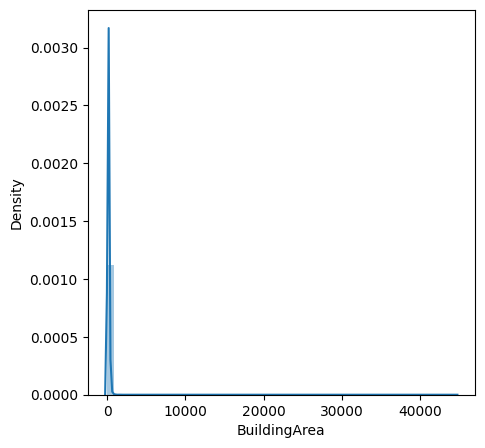

In [88]:
plt.figure(figsize = (5, 5)) #membuat grafik dengan luas 5x5
sns.distplot(dataset['BuildingArea']); #Memberi judul pada grafik

In [89]:
# mengisi data kosong
dataset['BuildingArea'].fillna('Unknown', inplace = True)

# mengonfirmasi data sudah diisi
print("Data kosong sebelum :", house['BuildingArea'].isnull().sum())
print("Data kosong sesudah :", dataset['BuildingArea'].isnull().sum())

Data kosong sebelum : 6450
Data kosong sesudah : 0


/tmp/ipykernel_33/3434773667.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['BuildingArea'].fillna('Unknown', inplace = True)
/tmp/ipykernel_33/3434773667.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset['BuildingArea'].fillna('Unknown', inplace = True)


# 4. Decision Tree

**4A. Mempersiapkan Data**

In [90]:
y = dataset.Price #membuat variabel Y sebagai harga rumah

In [92]:
# membuat variabel X sebagai spesifikasi rumah
spek_rumah = ['Rooms', 'Bathroom', 'Landsize', 'Bedroom2']
x = dataset[spek_rumah]

**4B. Melakukan Decision Tree**

In [94]:
# memuat library untuk membuat Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Mendefinisikan model
mel_dt = DecisionTreeRegressor(random_state=1)

# Memfitkan model
mel_dt.fit(x, y)

DecisionTreeRegressor(random_state=1)

In [96]:
# Membuat model decision tree, rumah dengan hasil prediksi tertinggi merupakan rumah dengan spesifikasi yang tinggi
print("Membuat prediksi 5 rumah pertama:")
print(x.head())
print("Hasil prediksi : ")
print(mel_dt.predict(x.head()))

Membuat prediksi 5 rumah pertama:
   Rooms  Bathroom  Landsize  Bedroom2
0      2       1.0     202.0       2.0
1      2       1.0     156.0       2.0
2      3       2.0     134.0       3.0
3      3       2.0      94.0       3.0
4      4       1.0     120.0       3.0
Hasil prediksi : 
[ 919200.          858950.         1081666.66666667  980000.
 1600000.        ]
